In [1]:
# Module 선언 및 초기화
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

import seaborn as sns
sns.set(style="darkgrid")

from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [2]:
cols = ['price', 'maint', 'doors', 'persons', 'lug_capacity', 'safety', 'output']
cars = pd.read_csv("C:\AI\car_evaluation.csv", names = cols, header = None)

In [3]:
cars.head()

,price,maint,doors,persons,lug_capacity,safety,output
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [4]:
print(cars.head())

   price  maint doors persons lug_capacity safety output
0  vhigh  vhigh     2       2        small    low  unacc
1  vhigh  vhigh     2       2        small    med  unacc
2  vhigh  vhigh     2       2        small   high  unacc
3  vhigh  vhigh     2       2          med    low  unacc
4  vhigh  vhigh     2       2          med    med  unacc


In [5]:
plot_size = plt.rcParams["figure.figsize"]  # 그래프 출력영역 변수 생성
plot_size  # 기본 크기 [6.4 , 4.8]

[6.4, 4.8]

In [6]:
plot_size[0] = 8
plot_size[1] = 6 
plt.rcParams["figure.figsize"] = plot_size  # 수정된 크기 [8 , 6]
plot_size

[8, 6]

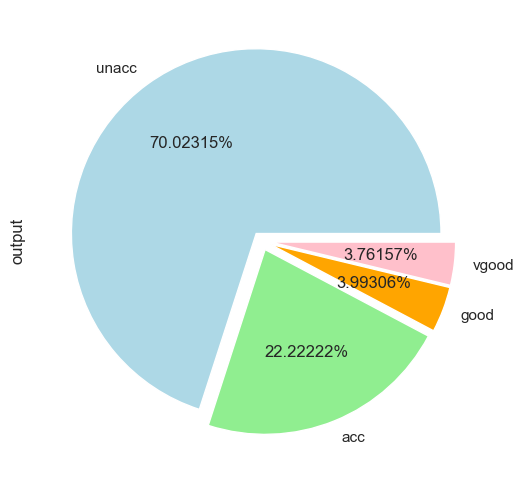

In [7]:
cars.output.value_counts().plot(kind='pie', autopct='%0.05f%%', colors=['lightblue', 
                        'lightgreen', 'orange', 'pink'], explode=(0.05, 0.05, 0.05, 0.05))
plt.show()

### 원-핫 인코딩
- 정답 데이터만 1로 처리하는 방법
- get_dummies

In [8]:
price = pd.get_dummies(cars.price, prefix='price')
maint = pd.get_dummies(cars.maint, prefix='maint')
doors = pd.get_dummies(cars.doors, prefix='doors')
persons = pd.get_dummies(cars.persons, prefix='persons')
lug_capacity = pd.get_dummies(cars.lug_capacity, prefix='lug_capacity')
safety = pd.get_dummies(cars.safety, prefix='safety')
labels = pd.get_dummies(cars.output, prefix='condition')  # 정답

In [9]:
x = pd.concat([price, maint, doors, persons, lug_capacity, safety], axis=1)  # axis : 합치는 방향(0 : 행단위, 1 : 열단위)
y = labels.values  # 정답데이터 생성

In [10]:
# 훈련입력, 테스트입력, 훈련정답, 테스트정답 순으로 반환됨
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [11]:
print(x_train.shape)  # 데이터의 형식
print(x_test.shape)   
print(y_train.shape)  
print(y_test.shape)   

(1382, 21)
(346, 21)
(1382, 4)
(346, 4)


In [12]:
print(x.shape[0])
print(x.shape[1])

1728
21


* Dense : 완전연결함수 (신경망 구조에서 완전히 다 연결된 구조)
* input_layer -> dense_layer_1 -> dense_layer_2 -> output
* softmax : 분류기법에서 가장 높은 수치 채택. (0.55 / 0.40 / 0.05 => 0.55 채택)

In [13]:
# 입력층 구성
input_layer = Input(shape=(x.shape[1], ))

# 은닉층 구성
dense_layer_1 = Dense(15, activation='relu')(input_layer)         # 입력층 - 은닉1층 연결
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)       # 은닉1층 - 은닉2층 연결

# 출력층 구성
output = Dense(y.shape[1], activation='softmax')(dense_layer_2)   # 은닉2층 - 출력층 연결

model = Model(inputs=input_layer, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
model.summary()  # model 요약

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense (Dense)                (None, 15)                330       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________


* batch_size : 가중치 업데이트 할 데이터의 묶음
* epochs : 반복 횟수
* verbose : 정보의 양(수준 = 0, 1, 2)
* validation_split : 검증용으로 추출할 데이터의 양
* loss : 손실 / acc : 정확 / val_loss : 검증용 손실 / val_acc : 검증용 정확

In [14]:
# 에포크마다 20% 를 추출하여 검증
history = model.fit(x_train, y_train, batch_size=8, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50
139/139 [==============================] - 0s 2ms/step - loss: 1.0030 - acc: 0.5448 - val_loss: 0.8980 - val_acc: 0.6498
Epoch 2/50
139/139 [==============================] - 0s 775us/step - loss: 0.7267 - acc: 0.7195 - val_loss: 0.7894 - val_acc: 0.6498
Epoch 3/50
139/139 [==============================] - 0s 845us/step - loss: 0.5984 - acc: 0.7195 - val_loss: 0.6396 - val_acc: 0.6715
Epoch 4/50
139/139 [==============================] - 0s 783us/step - loss: 0.4493 - acc: 0.7729 - val_loss: 0.4825 - val_acc: 0.7762
Epoch 5/50
139/139 [==============================] - 0s 723us/step - loss: 0.3350 - acc: 0.8706 - val_loss: 0.3855 - val_acc: 0.8412
Epoch 6/50
139/139 [==============================] - 0s 805us/step - loss: 0.2774 - acc: 0.8959 - val_loss: 0.3504 - val_acc: 0.8375
Epoch 7/50
139/139 [==============================] - 0s 727us/step - loss: 0.2450 - acc: 0.9050 - val_loss: 0.3149 - val_acc: 0.8736
Epoch 8/50
139/139 [==============================] - 0s 746us/s

In [17]:
score = model.evaluate(x_test, y_test, verbose=1)   # model 평가
# loss와 accuarcy 추출
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

11/11 [==============================] - 0s 730us/step - loss: 0.1063 - acc: 0.9682
Test Score: 0.1063428446650505
Test Accuracy: 0.9682080745697021
